In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv("C:/Users/Admin/Downloads/Dry_Bean_Dataset.csv")


In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645884.00,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620134.00,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=13611, step=1)

In [7]:
df.values

array([[28395, 610291.0, 208.178116708527, ..., 0.834222388245557,
        0.998723889013168, 'SEKER'],
       [28734, 638018.0, 200.524795663648, ..., 0.909850506397935,
        0.998430331449707, 'SEKER'],
       [29380, 624.11, 212.826129860206, ..., 0.825870616580032,
        0.999066137363272, 'SEKER'],
       ...,
       [42139, 759321.0, 281.539927914259, ..., 0.67688416388935,
        0.996767264359238, 'DERMASON'],
       [42147, 763779.0, 283.382636379951, ..., 0.668236683842453,
        0.99522241972615, 'DERMASON'],
       [42159, 772237.0, 295.142740988526, ..., 0.61622059234089,
        0.998179623305468, 'DERMASON']], dtype=object)

In [8]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [9]:
df = df.dropna(axis=0)

In [10]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [11]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,1.361100e+04,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,7.729110e+05,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,3.238848e+05,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,5.536000e+02,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,6.769955e+05,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,7.722730e+05,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,9.555000e+05,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1.921685e+06,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>],
       [<AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>],
       [<AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>,
        <AxesSubplot:title={'center':'Compactness'}>],
       [<AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>,
        <AxesSubplot:title={'center':'ShapeFactor4'}>]], dtype=object)

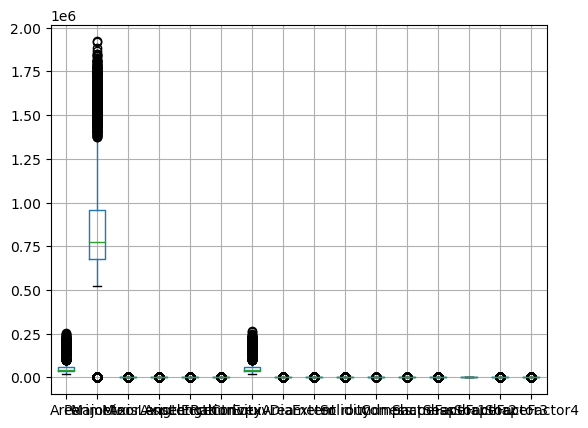

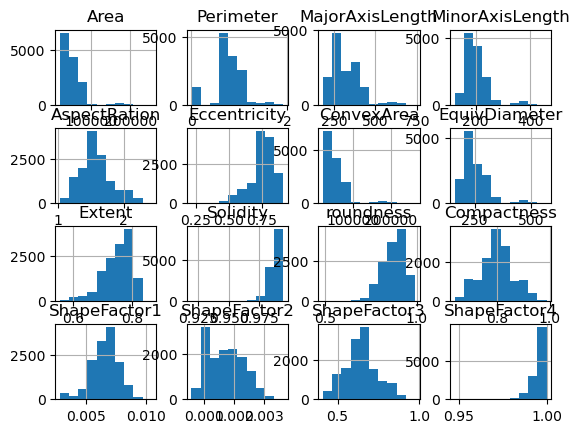

In [12]:
df.boxplot()
df.hist()

In [13]:
df = df.select_dtypes(include=[float, int])

In [14]:
independent_variable = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']
X = df[independent_variable]

print(type(X))
print(X)

target_variable ='Class'
Y=df[target_variable]

print(type(Y))
print(Y)

<class 'pandas.core.frame.DataFrame'>
        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395  610291.00       208.178117       173.888747      1.197191   
1      28734  638018.00       200.524796       182.734419      1.097356   
2      29380     624.11       212.826130       175.931143      1.209713   
3      30008  645884.00       210.557999       182.516516      1.153638   
4      30140  620134.00       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097  759696.00       288.721612       185.944705      1.552728   
13607  42101  757499.00       281.576392       190.713136      1.476439   
13608  42139  759321.00       281.539928       191.187979      1.472582   
13609  42147  763779.00       283.382636       190.275731      1.489326   
13610  42159  772237.00       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Sol

In [15]:
print(df.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395  610291.00       208.178117       173.888747      1.197191   
1  28734  638018.00       200.524796       182.734419      1.097356   
2  29380     624.11       212.826130       175.931143      1.209713   
3  30008  645884.00       210.557999       182.516516      1.153638   
4  30140  620134.00       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

import pickle

independent_variable = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']
X = df[independent_variable]

independent_variable_ordinal=['Class']
Class_categories=['BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ','SEKER','SIRA']

X_ordinal = df[independent_variable_ordinal]
Y=df[target_variable]

encOrdinalFeatures = preprocessing.OrdinalEncoder(categories=[Class_categories])
encOrdinalFeatures.fit(X_ordinal)

ordinalvalues = encOrdinalFeatures.transform(X_ordinal)
pickle.dump(encOrdinalFeatures,open("encOrdinalFeatures.p","wb"))

encOrdinalFeatures.categories_

pickle.dump(encOrdinalFeatures,open("encOrdinalFeatures.p","wb"))


In [17]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
labelEncoder.fit(Y)
labelEncoded_Y = labelEncoder.transform(Y)

print(labelEncoder.classes_)
print(labelEncoder.transform(labelEncoder.classes_))

y = labelEncoded_Y

dict_labelEncoder = dict(zip(labelEncoder.transform(labelEncoder.classes_),labelEncoder.classes_))

print(dict_labelEncoder)

pickle.dump(dict_labelEncoder,open("dict_labelEncoder.p","wb"))


['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
[0 1 2 3 4 5 6]
{0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'}


In [19]:
print(type(X))
print(X)
print(type(Y))
print(Y)

<class 'pandas.core.frame.DataFrame'>
        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395  610291.00       208.178117       173.888747      1.197191   
1      28734  638018.00       200.524796       182.734419      1.097356   
2      29380     624.11       212.826130       175.931143      1.209713   
3      30008  645884.00       210.557999       182.516516      1.153638   
4      30140  620134.00       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097  759696.00       288.721612       185.944705      1.552728   
13607  42101  757499.00       281.576392       190.713136      1.476439   
13608  42139  759321.00       281.539928       191.187979      1.472582   
13609  42147  763779.00       283.382636       190.275731      1.489326   
13610  42159  772237.00       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Sol

In [20]:
import tensorflow as tf

from tensorflow import keras

from keras.models import Sequential

from keras.layers import Dense

def getNormolizedData(X):
    
    norm = MinMaxScaler().fit(X)
    
    X_norm = norm.transform(X)
    X_train_norm = pd.DataFrame(X_norm, columns = X.columns.values)
    
    return X_train_norm;


In [21]:
X_train_norm=getNormolizedData(X);
X_train_norm.describe()


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,0.139320,0.402033,0.245905,0.236190,0.397295,0.768181,0.136386,0.224978,0.625380,0.900112,0.765693,0.459403,0.493356,0.371445,0.413253,0.910285
std,0.125212,0.168591,0.154332,0.133171,0.175517,0.132860,0.122744,0.144996,0.157895,0.061783,0.118786,0.177989,0.147006,0.192168,0.175392,0.083898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067926,0.352106,0.125531,0.157944,0.289902,0.717685,0.066084,0.131880,0.525344,0.880592,0.683497,0.351551,0.406861,0.190064,0.302997,0.884146
50%,0.103469,0.401700,0.204017,0.207054,0.374443,0.787743,0.100974,0.189141,0.657953,0.915228,0.785402,0.463478,0.503986,0.364216,0.410514,0.935698
75%,0.174691,0.497075,0.347394,0.279902,0.485429,0.854208,0.171533,0.289620,0.744779,0.938164,0.852681,0.558634,0.585601,0.517962,0.506118,0.964454
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
X_numpy = np.array(X_train_norm)
Y_numpy = np.array(Y)

print(type(X_numpy))
print(type(Y_numpy))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_numpy,Y_numpy,test_size=0.15,random_state=20)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=20)

In [24]:
print(y_train)
print(X_train)
print(X_test)
print(y_test)


['CALI' 'BARBUNYA' 'CALI' ... 'SIRA' 'DERMASON' 'HOROZ']
[[0.3329647  0.62825968 0.52562664 ... 0.11329654 0.25489369 0.73465376]
 [0.30236639 0.66150207 0.46322508 ... 0.16155207 0.33212897 0.93590101]
 [0.25026474 0.56638156 0.46036801 ... 0.118847   0.19711504 0.68719012]
 ...
 [0.11582179 0.42398058 0.22448238 ... 0.34157799 0.40177885 0.93684501]
 [0.03267349 0.32787939 0.09243586 ... 0.51629007 0.42038521 0.90376461]
 [0.19698885 0.5334291  0.4435812  ... 0.08819576 0.08533288 0.9277687 ]]
[[0.10851167 0.41331082 0.20098598 ... 0.39264059 0.45944077 0.96794316]
 [0.2084109  0.53492301 0.34416631 ... 0.24243599 0.38528594 0.8891193 ]
 [0.02564092 0.30970208 0.06005511 ... 0.65265649 0.53950879 0.96920528]
 ...
 [0.05821193 0.34928813 0.08794991 ... 0.69257808 0.69483669 0.97882716]
 [0.07944628 0.38356949 0.17466836 ... 0.38779571 0.39120053 0.97178987]
 [0.06828041 0.37338591 0.16187147 ... 0.39213838 0.37119059 0.95382963]]
['SIRA' 'BARBUNYA' 'DERMASON' ... 'SEKER' 'DERMASON' 'D

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

param_grid = { "n_estimators": [20,50,100,200,300,400,500,600,700,800,900,1000],
                    "max_depth": [1,2,3,4,5,6,7,8,9,10,11,12],
                    "max_samples": [50,100,200,250,1000,2000,3000,5000,6000,7000,9000],
                    "max_features":[5,6,7,8,9,10,11,12],
                     "criterion":['gini',"entropy"]
                     }

num_trees = 50
rf_model = RandomForestClassifier(random_state=1, max_depth=9, max_samples=1000, max_features=8, n_estimators = num_trees)

rf_model = RandomForestClassifier()

randomizedSearchCV = RandomizedSearchCV(
    estimator = rf_model, param_distributions = param_grid, n_iter=5, cv=5, verbose = 2, n_jobs=1, random_state=1)

randomizedSearchCVResults = randomizedSearchCV.fit(X_train, y_train)
#print(f"Best score = {randomizedSearchCVResults.best_score_}, Best Hyperparameters = {randomizedSearchCVResults.param_grid}")
print(f"Best score = {randomizedSearchCVResults.best_score_}, Best Hyperparameters = {randomizedSearchCVResults.best_params_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END criterion=gini, max_depth=1, max_features=6, max_samples=6000, n_estimators=600; total time=  43.1s
[CV] END criterion=gini, max_depth=1, max_features=6, max_samples=6000, n_estimators=600; total time=  32.5s
[CV] END criterion=gini, max_depth=1, max_features=6, max_samples=6000, n_estimators=600; total time=  33.5s
[CV] END criterion=gini, max_depth=1, max_features=6, max_samples=6000, n_estimators=600; total time=  33.2s
[CV] END criterion=gini, max_depth=1, max_features=6, max_samples=6000, n_estimators=600; total time=  36.4s
[CV] END criterion=gini, max_depth=12, max_features=9, max_samples=200, n_estimators=300; total time=   8.9s
[CV] END criterion=gini, max_depth=12, max_features=9, max_samples=200, n_estimators=300; total time=   9.4s
[CV] END criterion=gini, max_depth=12, max_features=9, max_samples=200, n_estimators=300; total time=  10.2s
[CV] END criterion=gini, max_depth=12, max_features=9, max_samples=2

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 385, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 111, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples,

Best score = 0.9140152591667885, Best Hyperparameters = {'n_estimators': 300, 'max_samples': 200, 'max_features': 9, 'max_depth': 12, 'criterion': 'gini'}


In [39]:
from sklearn.metrics import accuracy_score

# Assuming y_train and y_test are class labels (strings)
rf_model.fit(X_train, y_train)

print("Making predictions for the following in train set:")
predicted_values = rf_model.predict(X_train[0:10, :])
true_values = y_train[0:10]
print("True values are ", true_values)
print("The predicted values are", predicted_values)

print("Making predictions for the following in testing set:")
predicted_values = rf_model.predict(X_test[0:10, :])
true_values = y_test[0:10]
print("True values are ", true_values)
print("The predicted values are", predicted_values)

testing_accuracy = accuracy_score(true_values, predicted_values)
print("Accuracy Score in Testing set", testing_accuracy)

Making predictions for the following in train set:
True values are  ['CALI' 'BARBUNYA' 'CALI' 'SEKER' 'SIRA' 'CALI' 'CALI' 'HOROZ' 'DERMASON'
 'BOMBAY']
The predicted values are ['CALI' 'BARBUNYA' 'CALI' 'SEKER' 'SIRA' 'CALI' 'CALI' 'HOROZ' 'DERMASON'
 'BOMBAY']
Making predictions for the following in testing set:
True values are  ['SIRA' 'BARBUNYA' 'DERMASON' 'DERMASON' 'HOROZ' 'HOROZ' 'CALI' 'SIRA'
 'DERMASON' 'CALI']
The predicted values are ['SIRA' 'BARBUNYA' 'DERMASON' 'DERMASON' 'HOROZ' 'HOROZ' 'HOROZ' 'SIRA'
 'DERMASON' 'CALI']
Accuracy Score in Testing set 0.9


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


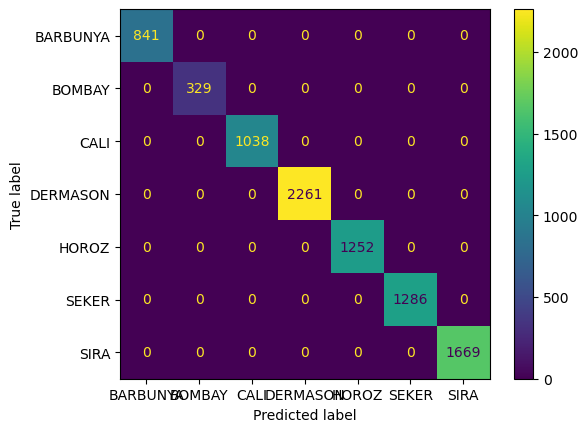

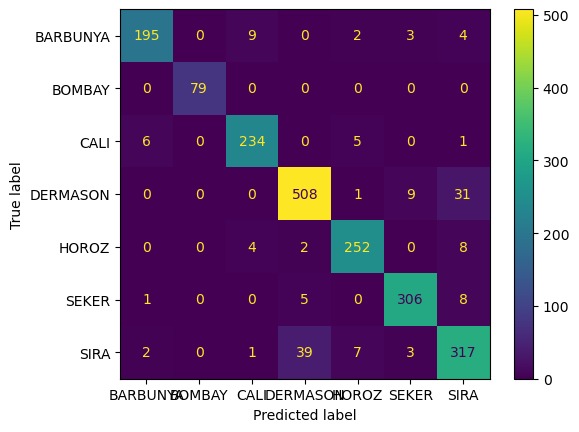

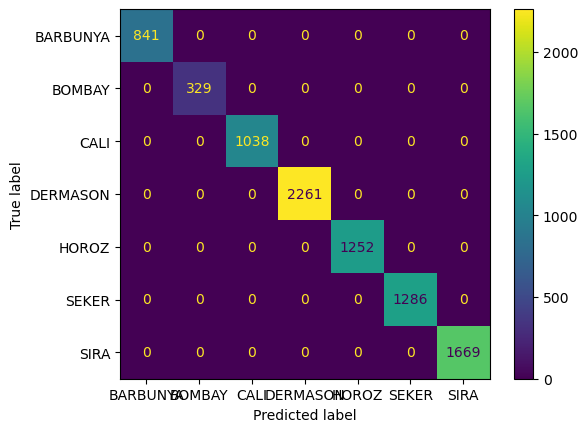

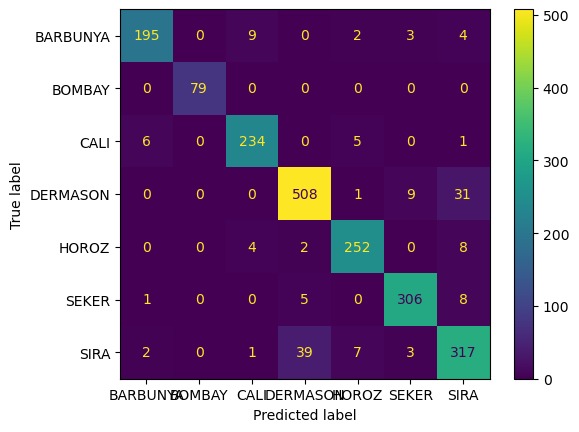

In [41]:
# confusion matrix plot

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(rf_model, X_train, y_train, values_format="d")
plot_confusion_matrix(rf_model, X_test, y_test)
plt.show()

In [42]:
training_accuracy = accuracy_score(y_train,rf_model.predict(X_train))
print("Average Training Accuracy ", training_accuracy)

testing_accuracy = accuracy_score(y_test,rf_model.predict(X_test))
print("Average Testing Accuracy ", testing_accuracy)

Average Training Accuracy  1.0
Average Testing Accuracy  0.9260528893241919


In [46]:
pickle.dump(rf_model, open(" machinelearning_model.p", "wb"))

In [47]:
import tensorflow as tf

from tensorflow import keras

from keras.models import Sequential

from keras.layers import Dense

In [48]:
def get_nn_model_function1(n_inputs, n_outputs):
    nn_model = Sequential()
    
    nn_model.add(tf.keras.layers.Dense(50, activation = 'relu'))
    nn_model.add(tf.keras.layers.Dense(100, activation = 'relu'))
    nn_model.add(tf.keras.layers.Dense(50, activation = 'relu'))
    nn_model.add(tf.keras.layers.Dense(1))
    
    nn_model.compile('adam', loss = 'mse', metrics = ['mse'])
    return nn_model

def get_nn_model_function2(n_inputs, n_outputs):
    network = Sequential()
    
    network.add(Dense(n_inputs, input_shape=(n_inputs,), kernel_initializer = 'normal', activation = 'relu'))
    
    network.add(Dense(16, activation = 'relu'))
    network.add(Dense(6, activation = 'relu'))
    network.add(Dense(4, activation = 'relu'))
    
    network.add(Dense(n_outputs, activation = 'relu'))
    
    network.compile('adam', loss='mse', metrics=['mse'])
    return network

In [49]:
print(X_train.shape[1]);
n_inputs = X_train.shape[1]
n_outputs = 1

nn_model = get_nn_model_function2(n_inputs, n_outputs)

16
